In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
# Папка с экспериментами
experiments_dir = Path("./../best_experiments")

# Список всех экспериментов
experiments = list(experiments_dir.glob("*/"))

data = []

In [3]:
# Загружаем данные из всех экспериментов
for exp in experiments:
    used_features_path = exp / "used_features.json"
    validation_results_path = exp / "validation_results.json"

    if used_features_path.exists() and validation_results_path.exists():
        with open(used_features_path, "r") as f:
            used_features = json.load(f)

        with open(validation_results_path, "r") as f:
            validation_results = json.load(f)

        mape = validation_results.get("MAPE")

        if mape is not None:
            feature_dict = {feature: 1 for feature in used_features}
            feature_dict["MAPE"] = mape
            data.append(feature_dict)

# Создаем DataFrame
df = pd.DataFrame(data).fillna(0)

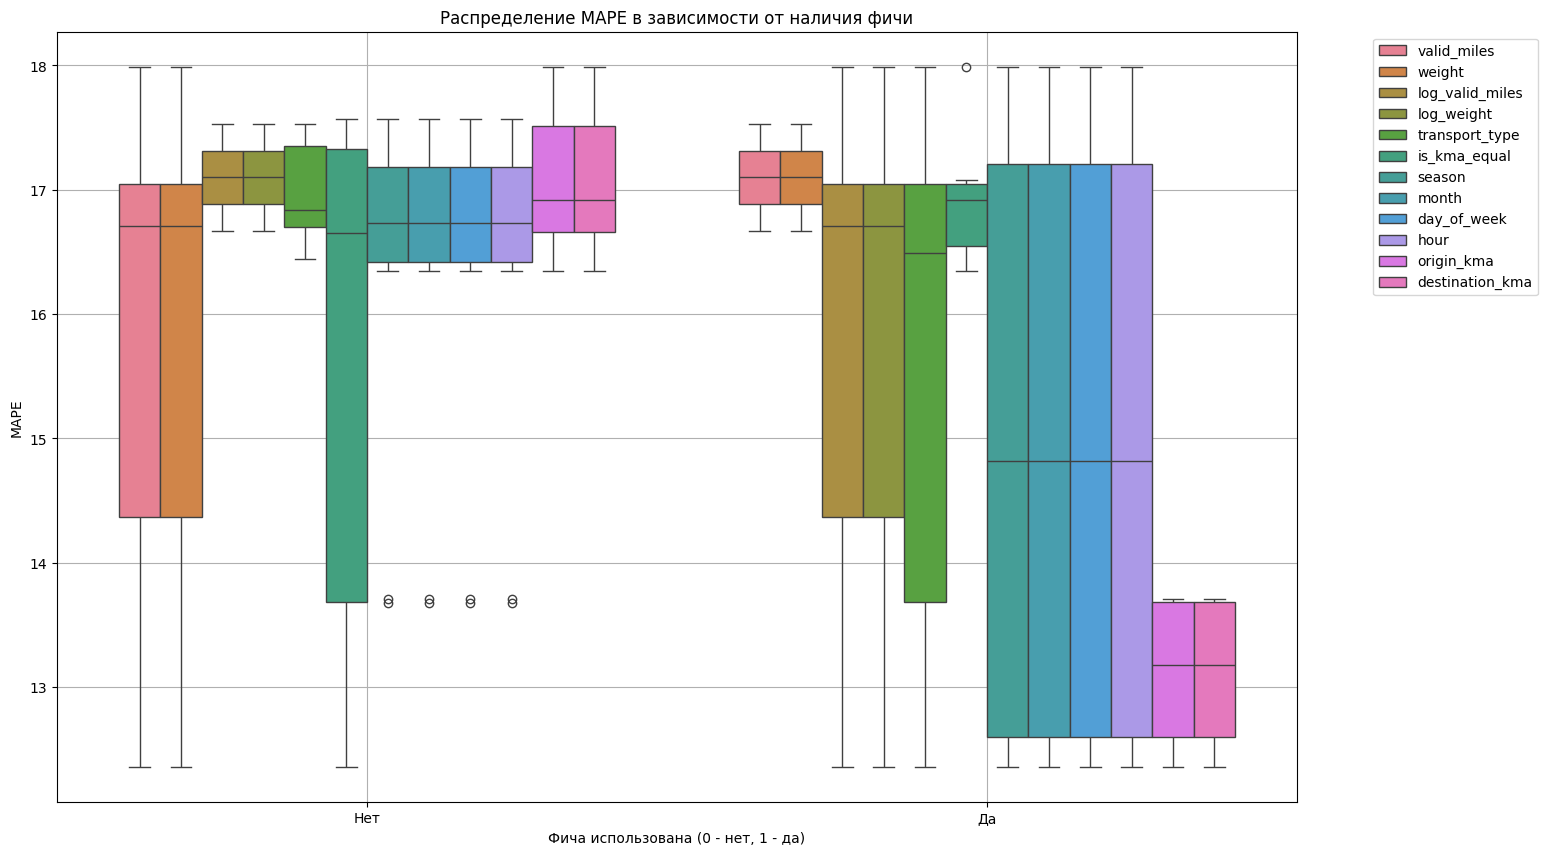

In [4]:
# Boxplot: распределение MAPE в зависимости от наличия фичи
plt.figure(figsize=(16, 10))
df_melted = df.melt(id_vars=["MAPE"], var_name="Feature", value_name="Used")
sns.boxplot(x="Used", y="MAPE", hue="Feature", data=df_melted)
plt.title("Распределение MAPE в зависимости от наличия фичи")
plt.xlabel("Фича использована (0 - нет, 1 - да)")
plt.ylabel("MAPE")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.xticks([0, 1], ["Нет", "Да"])
plt.grid()
plt.show()


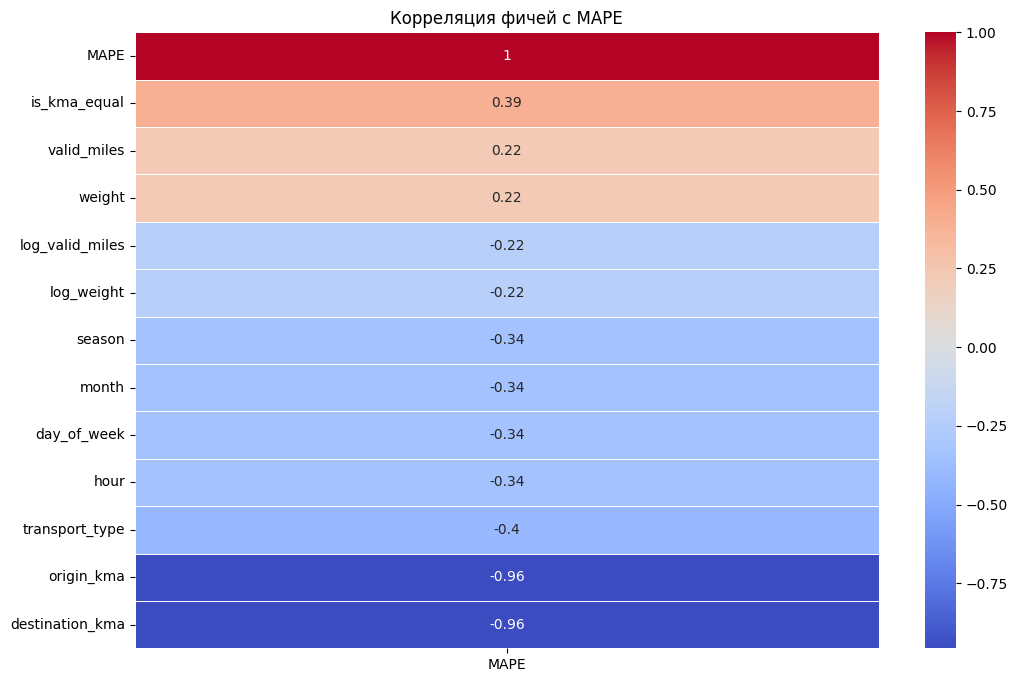

In [5]:
# Heatmap: корреляция фичей с MAPE
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr[["MAPE"]].sort_values("MAPE", ascending=False), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Корреляция фичей с MAPE")
plt.show()

C:\Users\Mi\AppData\Local\Temp\ipykernel_24352\1658325391.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mean_mape = df_melted.groupby("Feature").apply(lambda x: x[x["Used"] == 1]["MAPE"].mean()).sort_values()


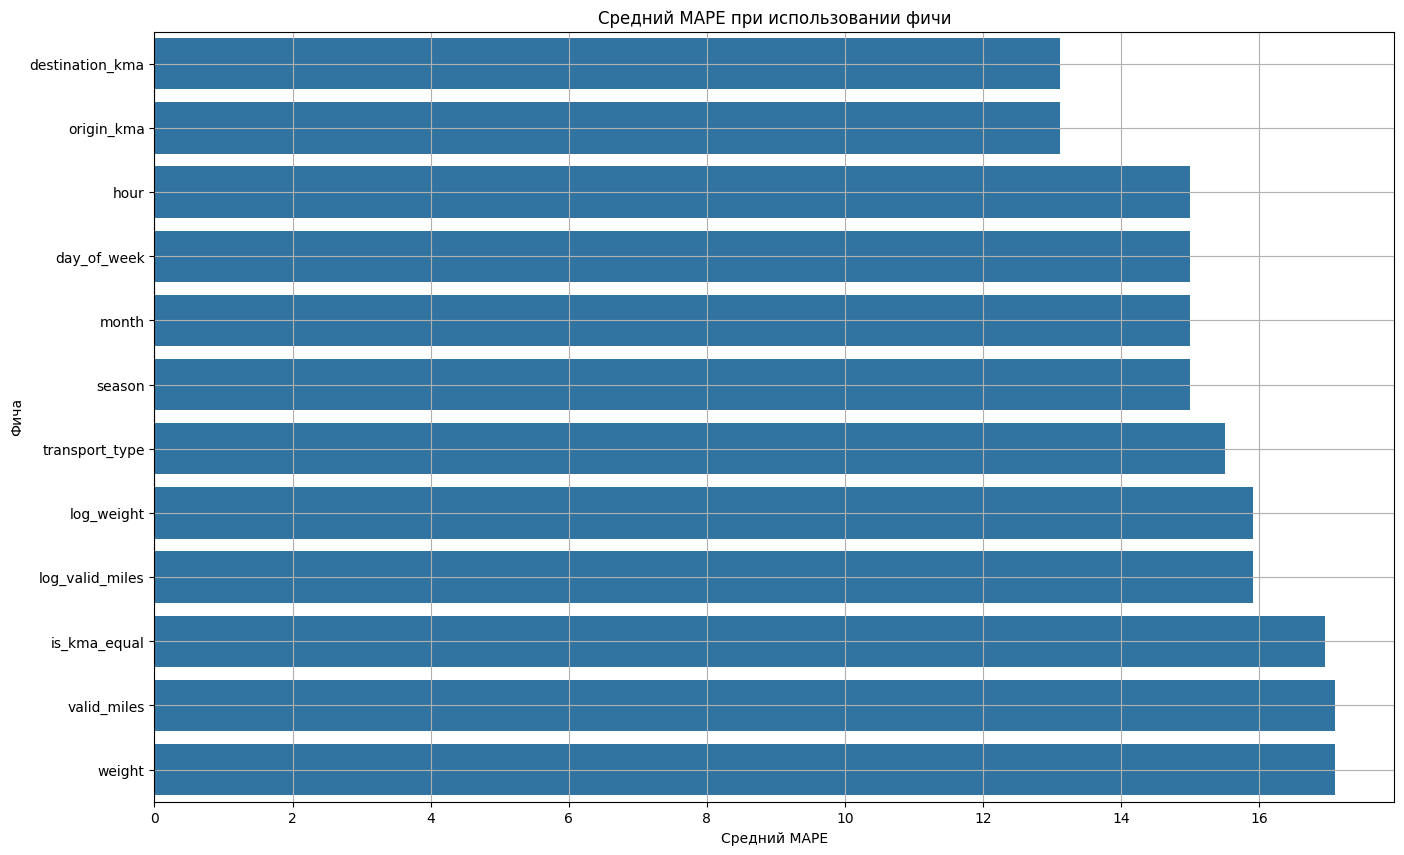

In [8]:
# Barplot: средний MAPE при использовании каждой фичи
plt.figure(figsize=(16, 10))
mean_mape = df_melted.groupby("Feature").apply(lambda x: x[x["Used"] == 1]["MAPE"].mean()).sort_values()
sns.barplot(y=mean_mape.index, x=mean_mape.values)
plt.title("Средний MAPE при использовании фичи")
plt.xlabel("Средний MAPE")
plt.ylabel("Фича")
plt.grid()
plt.show()

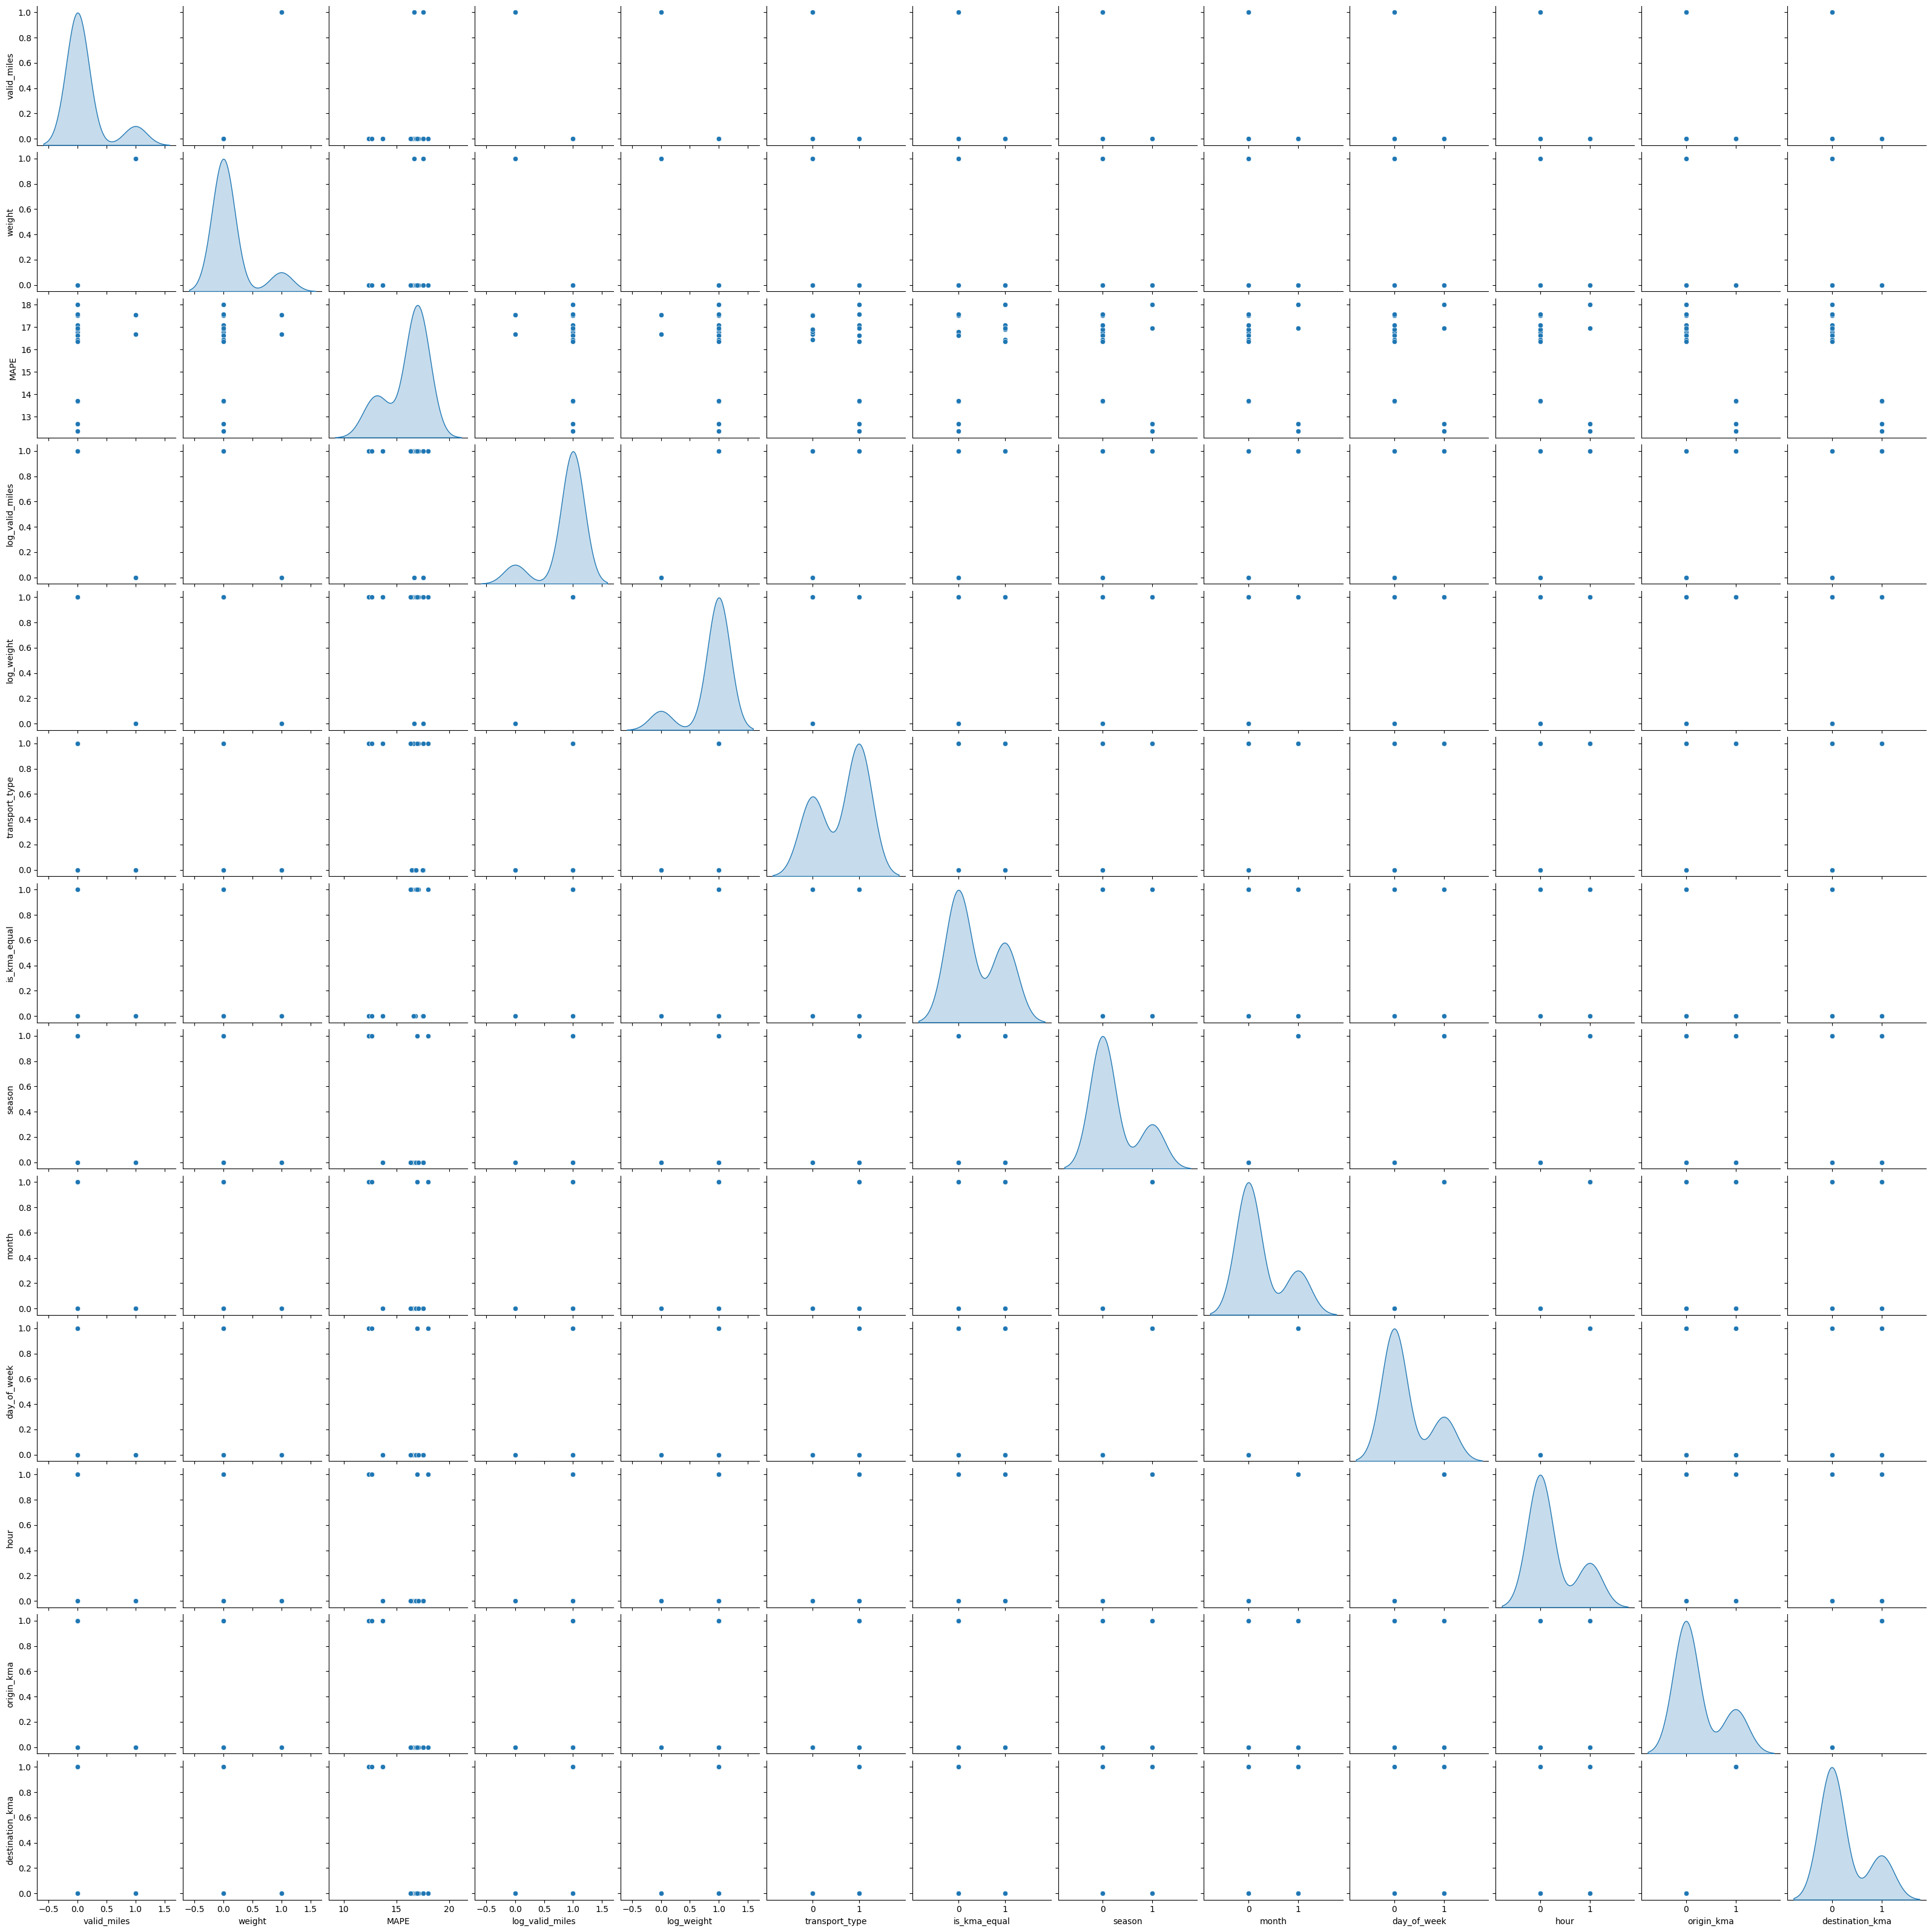

In [7]:
# Pairplot: исследуем возможные зависимости
sns.pairplot(df, diag_kind="kde")
plt.show()